# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('data/human_body_temperature.csv')

In [55]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


**We are going to start figuring out whether there is any missing value or not. Instead of using some statistical results we prefered to visualize the null or NaN values using heatmap plot. As seen below there is no missing value.**

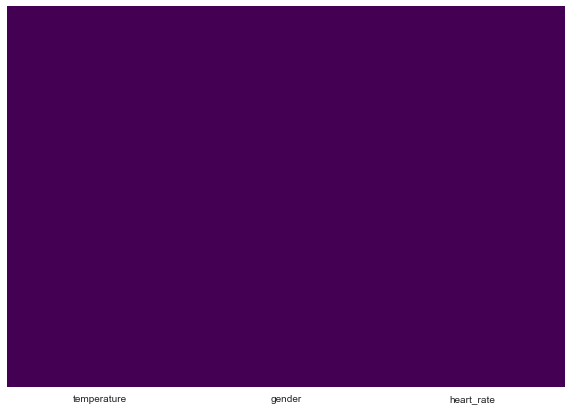

In [57]:
plt.figure(figsize =(10,7))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


By implementing .decribe() function to check out the statistics of the data sets, we see that Female mean and standard error is higher than Male. 

In [116]:
print ('The statistics of the data set')
print (df.describe())
print ('\n')
print ('The statistics of Male data set:')
print (df[df.gender == 'M'].describe())
print ('\n')
print ('The statistics of Female data set:')
print (df[df.gender == 'F'].describe())

The statistics of the data set
       temperature  heart_rate
count   130.000000  130.000000
mean     98.249231   73.761538
std       0.733183    7.062077
min      96.300000   57.000000
25%      97.800000   69.000000
50%      98.300000   74.000000
75%      98.700000   79.000000
max     100.800000   89.000000


The statistics of Male data set:
       temperature  heart_rate
count    65.000000   65.000000
mean     98.104615   73.369231
std       0.698756    5.875184
min      96.300000   58.000000
25%      97.600000   70.000000
50%      98.100000   73.000000
75%      98.600000   78.000000
max      99.500000   86.000000


The statistics of Female data set:
       temperature  heart_rate
count    65.000000   65.000000
mean     98.393846   74.153846
std       0.743488    8.105227
min      96.400000   57.000000
25%      98.000000   68.000000
50%      98.400000   76.000000
75%      98.800000   80.000000
max     100.800000   89.000000


**Addition to *.describe()* function we can plot Male and Female distribution in 'gender' column to show that they are balanced. As it is seen below *65 Male* and *65 Female* data was input.** 

M    65
F    65
Name: gender, dtype: int64


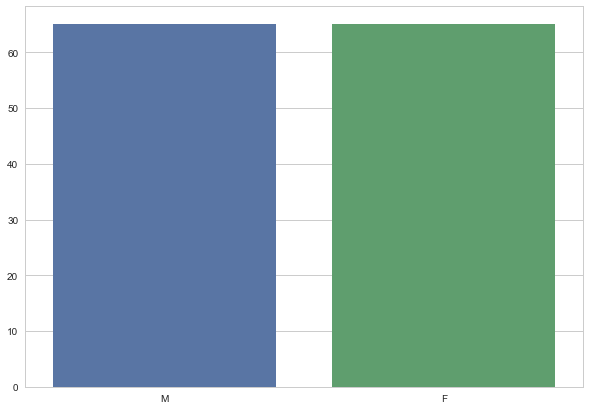

In [91]:
gender_dist = df.gender.value_counts()
print (gender_dist)
plt.figure(figsize =(10,7))
_ = sns.barplot(gender_dist.index, gender_dist.values)

**In the scatter plot shown below, it seems that there is correlation between heart rate and body temperature. There are some outliers in the female data.** 

**Additional to the statistics function (*.describe()*) It is time to look at the swarm plot and layered box plot to depict median, distribution and variance of the data.As it is seen on the swarm&box plot. Female body temperature's median is higher than male. Female temperature has outliers as stated before.**  

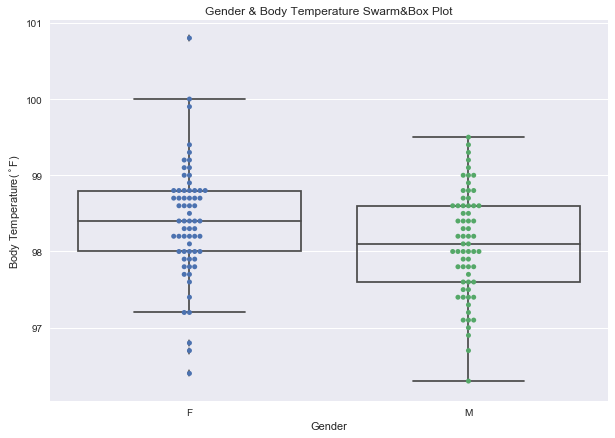

The std of the Female Temperature: 0.737746448643
The variance of the Female Temperature: 0.544269822485


The std of the Male Temperature: 0.693359884183
The variance of the Male Temperature: 0.480747928994


In [360]:
plt.figure(figsize = (10,7))
_ = sns.swarmplot(x= 'gender', y = 'temperature', data = df)
_ = sns.boxplot(x="gender", y="temperature", data=df, boxprops={'facecolor':'None'})
_ = plt.xlabel('Gender')
_ = plt.ylabel('Body Temperature($^\circ$F)')
_ = plt.title ('Gender & Body Temperature Swarm&Box Plot')
plt.show()
print ('The std of the Female Temperature: {}'. format(np.std(df.temperature[df.gender =='F'].values)))
print ('The variance of the Female Temperature: {}'. format(np.var(df.temperature[df.gender =='F'].values)))
print ('\n')
print ('The std of the Male Temperature: {}'. format(np.std(df.temperature[df.gender =='M'].values)))
print ('The variance of the Male Temperature: {}'. format(np.var(df.temperature[df.gender =='M'].values)))

# 1. Is the distribution of body temperatures normal?

**a.**

The normal distribution is in its most general form, under some conditions (which include finite variance), it states that averages of samples of observations of random variables independently drawn from independent distributions converge in distribution to the normal, that is, become normally distributed when the number of observations is sufficiently large. Physical quantities that are expected to be the sum of many independent processes (such as measurement errors) often have distributions that are nearly normal. Moreover, many results and methods (such as propagation of uncertainty and least squares parameter fitting) can be derived analytically in explicit form when the relevant variables are normally distributed.
The normal distribution is sometimes informally called the bell curve. However, many other distributions are bell-shaped.

For an approximately normal data set, the values within one standard deviation of the mean account for about 68% of the set; while within two standard deviations account for about 95%; and within three standard deviations account for about 99.7%. Shown percentages are rounded theoretical probabilities intended only to approximate the empirical data derived from a normal population.

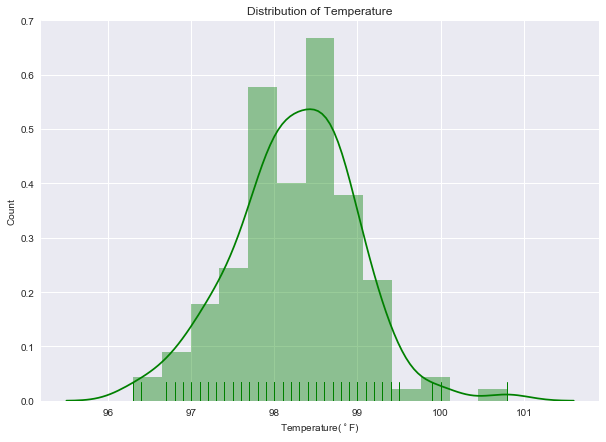

In [359]:
plt.figure(figsize=(10,7))
sns.distplot(df.temperature, rug='True', color = 'green', norm_hist = True)
plt.xlabel('Temperature($^\circ$F)', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Distribution of Temperature', fontsize=12)
plt.show()

**b.** 

**The function below tests the null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s test that combines skew and kurtosis to produce an omnibus test of normality. In this test significance level us defined as 0.001, since the p_value is slightly bigger than significance level, which means that we can not reject that observations of temperature has normal distribution.

In [176]:
from scipy import stats
k2, p = stats.normaltest(df.temperature)
alpha = 1e-3
print ("alpha = {:g}".format(alpha))
print ("p = {:g}".format(p))
print (k2)
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

alpha = 0.001
p = 0.258748
2.70380143332
The null hypothesis cannot be rejected


**c.** 

**68–95–99.7 Rule is a shorthand used to remember the percentage of values that lie within a band around the mean in a normal distribution with a width of two, four and six standard deviations, respectively; more accurately, 68.27%, 95.45% and 99.73% of the values lie within one, two and three standard deviations of the mean, respectively.** 

In [189]:
temp_mean = np.mean(df.temperature)
temp_std = np.std(df.temperature)
print("The mean of human temperature data set: {}".format(temp_mean))
print("The standard deviation in human temperature data set: {}".format(temp_std))

The mean of human temperature data set: 98.2492307692
The standard deviation in human temperature data set: 0.730357778905


In [212]:
np_temp = df.temperature.values
num_obs = len(np_temp[(np_temp > temp_mean-3*temp_std) & (np_temp < temp_mean+3*temp_std)])
print('Number  of observations within three standard deviations of the mean: {}'.format(num_obs))
print("Total number of observations is {}".format(len(df)))
prop_obs = float(num_obs) / len(np_temp)
print('Proportion of observations within three standard deviations of the mean: {}'.format(prop_obs))

Number  of observations within three standard deviations of the mean: 129
Total number of observations is 130
Proportion of observations within three standard deviations of the mean: 0.992307692308


**d. Depicting with ECDF Plot**

In [339]:
# Implement the bootstrapping functions from the Datacamp Course: Statistical Thinking in Python (Part 1)
# Author: Justin Bois
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    
    # Number of data points: n
    n= len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)
    
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / float(n)
    
    return x, y

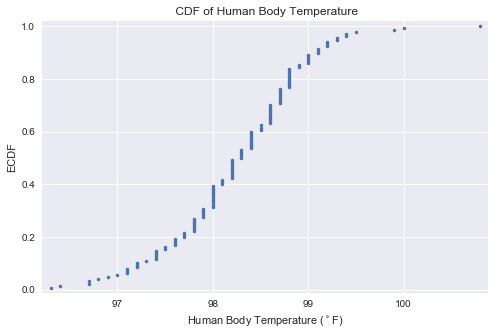

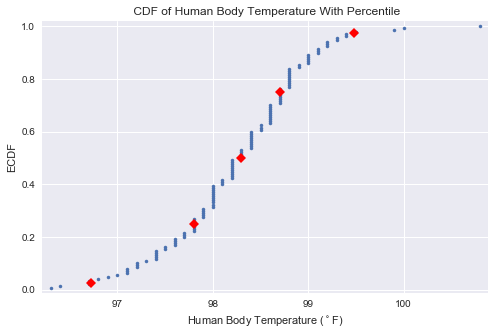

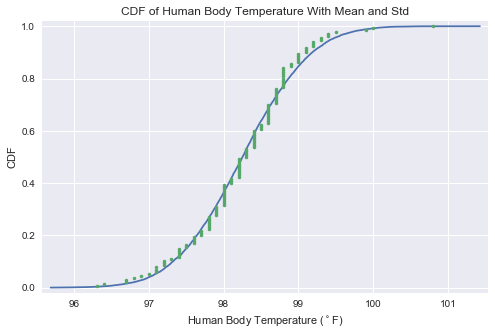

In [362]:
sns.set()
temp_np_array = np.array(df.temperature)

# Compute ECDF for versicolor data: x_vers, y_vers
x_temp, y_temp = ecdf(temp_np_array)
plt.figure(figsize = (8,5))
# Generate plot
_ = plt.plot(x_temp, y_temp, marker = '.', linestyle = 'none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Human Body Temperature ($^\circ$F)')
_ = plt.ylabel('ECDF')
_ = plt.title(' CDF of Human Body Temperature')
# Display the plot
plt.show()

# Specify array of percentiles: percentiles
percentiles = np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_vers
ptiles_temp = np.percentile(temp_np_array, percentiles)

# Print the result
#print (ptiles_temp)

x_temp, y_temp = ecdf(temp_np_array)
plt.figure(figsize = (8,5))

# Generate plot
_ = plt.plot(x_temp, y_temp, marker = '.', linestyle = 'none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Human Body Temperature ($^\circ$F)')
_ = plt.ylabel('ECDF')
_ = plt.title(' CDF of Human Body Temperature With Percentile')
# Display the plot

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_temp, percentiles/100, marker='D', color='red', linestyle='none')

plt.show()

# Compute mean and standard deviation: mu, sigma
mu = np.mean(temp_np_array)
sigma = np.std(temp_np_array)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu,sigma, size = 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(temp_np_array)
# Plot the CDFs and show the plot
plt.figure(figsize = (8,5))
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Human Body Temperature ($^\circ$F)')
_ = plt.ylabel('CDF')
_ = plt.title('CDF of Human Body Temperature With Mean and Std')
plt.show()

**After these results we validate that df.temperature is normally distributed.**

# 2. Is the sample size large? Are the observations independent?
**Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.**

Sample size (*len(def['temperature']) =130*) is large enough. Two observations are independent if the occurrence of one observation provides no information about the occurrence of the other observation.  A simple example is measuring the height of everyone in your sample at a single point in time.  These should be unrelated observations.  However, if you were to measure one child's height over time, these observations would be dependent because the height at each time point would affect the height at future time points. The statistical assumption of independence of observations stipulates that all participants in a sample are only counted once. If a participant was to appear multiple times in a sample, each time as an independent observation, then the statistics would be artificially skewed in their favor and not be representative of a true sample of independent participants. Independence of observations makes sure that each participant's variance affects the overall analysis just once. In terms of the temperature & heart_rate, these oservations are independent.

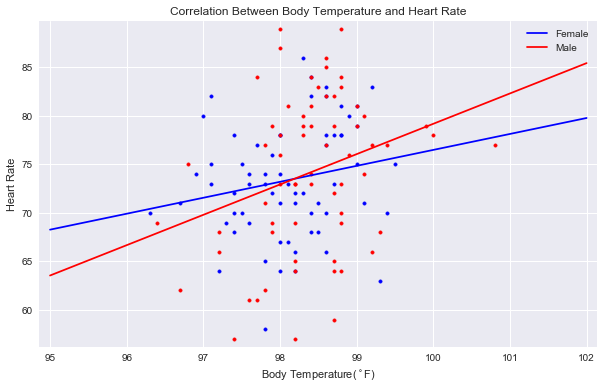

In [358]:
sns.set()
plt.figure(figsize = (10,6))
_ = plt.scatter(df.temperature[df.gender =='M'], df.heart_rate[df.gender == 'M'], color = 'blue', marker = '.', norm = True)
_ = plt.scatter(df.temperature[df.gender =='F'], df.heart_rate[df.gender == 'F'], color = 'red', marker = '.', norm = True)

xm, ym = np.polyfit(df[df.gender=='M']['temperature'], df[df.gender=='M']['heart_rate'], 1)
xf, yf = np.polyfit(df[df.gender=='F']['temperature'], df[df.gender=='F']['heart_rate'], 1)
# Make theoretical line to plot
x = np.array([95,102])
y_m = xm * x + ym
y_f = xf * x + yf
# Add regression line to your plot
_ = plt.plot(x, y_m, color='blue')
_ = plt.plot(x, y_f, color='red')
_ = plt.legend(('Female','Male'))
_ = plt.xlabel("Body Temperature($^\circ$F)")
_ = plt.ylabel("Heart Rate")
_ = plt.title('Correlation Between Body Temperature and Heart Rate')
plt.margins(0.02)


**But As you can see on the plot above, there is possitive correlation between independent observations, Body Temperature and Heath Rate.**

In [260]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)
    # Return entry [0,1]
    return corr_mat[0,1]

print("The pearson correlation of human temperature and heart rate in the data set: {}".format(pearson_r(df['temperature'],df['heart_rate'])))
print("The pearson correlation of human temperature and heart rate of Males in the data set: {}".format(pearson_r(df[df.gender == 'M']['temperature'], df[df.gender == 'M']['heart_rate'])))
print("The pearson correlation of human temperature and heart rate of Females in the data set: {}".format(pearson_r(df[df.gender == 'F']['temperature'], df[df.gender == 'F']['heart_rate'])))

The pearson correlation of heart rate and human temperature in the data set: 0.253656402721
The pearson correlation of heart rate and human temperature of Males in the data set: 0.195589375097
The pearson correlation of heart rate and human temperature of Females in the data set: 0.286931154497


# 3. Is the true population mean really 98.6 degrees F?
First, try a bootstrap hypothesis test.
Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  tt  or  zz  statistic?
Now try using the other test. How is the result be different? Why?

**a. Bootstrap hypothesis**
H0 : The null hypothesis : The population mean temperature is 98.6F (claim)
Ha : The alternate hypotheses : The population mean temperature differs from 98.6F F.

In [265]:
# Implement the bootstrapping functions from the Datacamp Course: Statistical Thinking in Python (Part 2)
# Author: Justin Bois

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))   
## Create a function to draw the boot-strap samples
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
            bs_replicates[i] = bootstrap_replicate_1d(data, func)            
    return bs_replicates

Text(0.5,1,u'Distribution of Mean Temperature')

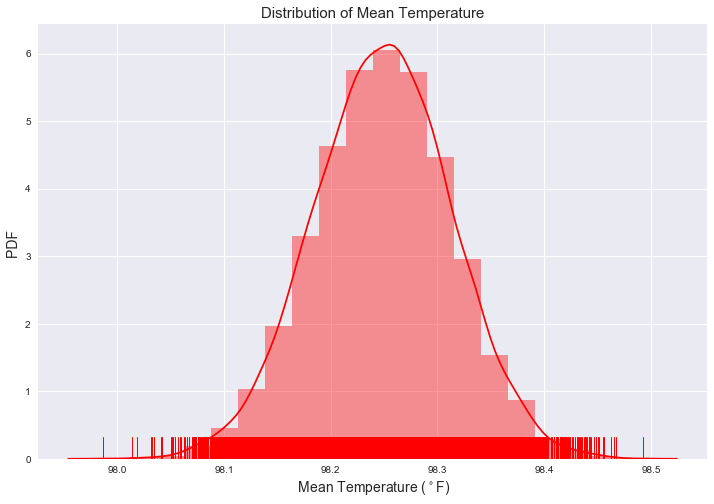

In [357]:
temp_np_array = np.array(df['temperature'])
bs_replicates  = draw_bs_reps(temp_np_array, np.mean, 10000)
plt.figure(figsize=(12,8))
sns.distplot(bs_replicates, rug='True', bins=20, color = 'red')
plt.xlabel(' Mean Temperature ($^\circ$F)', fontsize=14)
plt.ylabel('PDF ', fontsize=14)
plt.title('Distribution of Mean Temperature', fontsize=15)

In [270]:
# Compute the confidence interval
conf_int = np.percentile(bs_replicates,[2.5, 97.5])
# Print the confidence interval
print('95% confidence interval =', conf_int)

('95% confidence interval =', array([ 98.12538462,  98.37461538]))


In [272]:
# Compute fraction of replicates that are greater (p-value)
p = np.sum(bs_replicates >= 98.6) / len(bs_replicates)
print ('p-value', p)

('p-value', 0)


Since p-value is 0 or less than 0.05, we reject the claim that the mean Human temperature is 98.6 in favor of the alternative hypothesis that the poulation mean differs from 98.6 F. Based on the 95% confidence interval, temperatures between 98.12 and 98.37 are considered normal.

**b. Frequentist Statistical Testing.**

One does not know what the mean temperature is is. However, its value is fixed (not a random one). Therefore, one cannot assign probabilities to the mean being equal to a certain value, or being less than/greater than some other value. The most one can do is collect data from a sample of the population and estimate its mean as the value which is most consistent with the data

For normally distributed data, it’s quite straightforward: the maximum likelihood estimate of the population mean is equal to the sample mean.

In [274]:
print("The mean human temperature in the data set is {}".format(np.mean(df['temperature'])))
print("Therefore we infer that the population mean  differs from 98.6 F")

The mean human temperature in the data set is 98.2492307692
Therefore we infer that the population mean  differs from 98.6 F


**1-sample or 2-sample test ?**
The 2-sample t-test takes a sample data from two groups and boils it down to the t-value. For the estimation of mean Human temperature, 1-sample test should be used.

**1-sample test
Null hypothesis: The true mean is 98.6**

In [307]:
# Make an array of translated temperatures: translated_temp

translated_temp = temp_np_array - np.mean(temp_np_array) + 98.6

# Take bootstrap replicates of body temperatures: temp_replicates
temp_replicates = draw_bs_reps(translated_temp, np.mean, 10000)

# Compute fraction of replicates that are less than the observed body temperatures: p
p = np.sum(temp_replicates <= np.mean(temp_np_array)) / 10000

# Print the p-value
print ('p-value: {}'.format(float(p)))

# t-test work 
sample_mean = np.mean(temp_np_array) 
sample_std  = np.std(temp_np_array)
sample_size = len(temp_np_array)
mu_0 = 98.6
t_statistic = (sample_mean - mu_0) / (sample_std / sample_size**0.5)

from scipy import stats
# Multiply by two for the two tailed test
t_result = stats.norm.sf(abs(t_statistic))*2
print('t-statistic = {}'.format(t_result))

# To conduct a z test we assume the population std is the same as the sample std
population_std = sample_std
z_statistic = (sample_mean - mu_0) / (population_std / sample_size**0.5)
z_result = stats.norm.sf(abs(z_statistic))*2
print('z-statistic = {}'.format(z_result))

p-value: 0.0
t-statistic = 4.35231516587e-08
z-statistic = 4.35231516587e-08


**Since t-statistic and z-statistic are slightly less than 0.05, we reject the null hypothesis that the true mean is 98.6**

# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
**Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?
Null hypothesis: The true mean is 98.6**

In [354]:
# Randomly select a size 10 array: 
temp_array_sub = np.random.choice(temp_np_array, size=10, replace=True)

# Make an array of translated sample temperatures: translated_temp_sub
translated_temp_sub = temp_array_sub - np.mean(temp_array_sub) + 98.6

# Take bootstrap replicates of sampled body temperatures: temp_replicates_sub
temp_replicates_sub = draw_bs_reps(translated_temp_sub, np.mean, 10000)

# Compute fraction of replicates that are less than sampled body temperatures: p
p = np.sum(temp_replicates_sub <= np.mean(temp_array_sub)) / float(10000)

# Print the p-value
print ('p-value: {}'.format(p))

# t-test work 
sample_mean = np.mean(temp_array_sub) 
sample_std  = np.std(temp_array_sub)
sample_size = len(temp_array_sub)
mu_0 = 98.6
t_statistic = (sample_mean - mu_0) / (sample_std / sample_size**0.5)

from scipy import stats
# Multiply by two for the two tailed test
t_result = stats.norm.sf(abs(t_statistic))*2
print('t-statistic = {}'.format(t_result))

# To conduct a z test we assume the population std is the same as the sample std
population_std = sample_std
z_statistic = (sample_mean - mu_0) / (population_std / sample_size**0.5)
z_result = stats.norm.sf(abs(z_statistic))*2
print('z-statistic = {}'.format(z_result))

p-value: 0.145
t-statistic = 0.287143533089
z-statistic = 0.287143533089


**Since p-value is greater than 0.05, we can not reject null Hypothesis that the true mean is 98.6 F. Each time once we run the code, we get different t and z statistics since the sample size is too small to evaluate. Therefore z and t statistics are not reliable at this point.**  

# 5. At what temperature should we consider someone's temperature to be "abnormal"?

As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

**We will get a 95% confidence interval according to the normal distribution to find out the outliers.**

**a.Bootstrap Approach**

In [305]:
bs_replicates = draw_bs_reps(temp_np_array, np.mean, 10000)
# Compute the confidence interval
conf_int = np.percentile(bs_replicates,[2.5, 97.5])
# Print the confidence interval
print('95 % confidence interval = {}'.format(conf_int))

95 % confidence interval = [ 98.12461538  98.37615385]


*Values are not between 98.12 and 98.37 are determined as abnormals. 

**b.Frequentist Approach**

In [326]:
translated_temp = temp_np_array - np.mean(temp_np_array) + 98.6

# Take bootstrap replicates of body temperatures: temp_replicates
temp_replicates = draw_bs_reps(translated_temp, np.mean, 10000)
conf_int = np.percentile(temp_replicates, [2.5, 97.5])
# Print the confidence interval
print('95 % confidence interval = {}'.format(conf_int))

95 % confidence interval = [ 98.47692308  98.72461538]


*In Frequentist approach we end up with the temperature between 98.47 and 98.72 as abnormals.

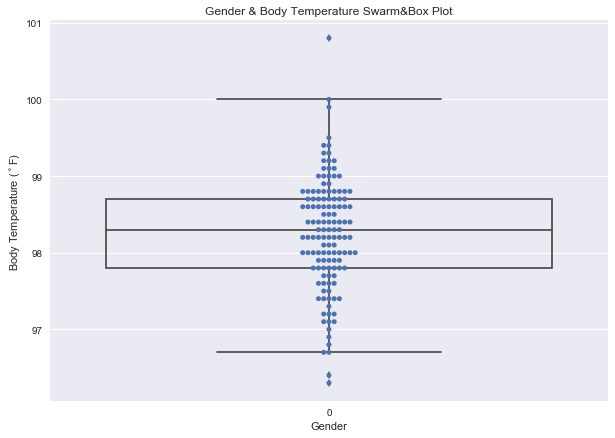

The std of the Female Temperature: 0.737746448643
The variance of the Female Temperature: 0.544269822485


The std of the Male Temperature: 0.693359884183
The variance of the Male Temperature: 0.480747928994


In [356]:
plt.figure(figsize = (10,7))
_ = sns.swarmplot(data = df.temperature)
_ = sns.boxplot(data=df.temperature, boxprops={'facecolor':'None'})
_ = plt.xlabel('Gender')
_ = plt.ylabel('Body Temperature ($^\circ$F)')
_ = plt.title ('Gender & Body Temperature Swarm&Box Plot')
plt.show()
print ('The std of the Female Temperature: {}'. format(np.std(df.temperature[df.gender =='F'].values)))
print ('The variance of the Female Temperature: {}'. format(np.var(df.temperature[df.gender =='F'].values)))
print ('\n')
print ('The std of the Male Temperature: {}'. format(np.std(df.temperature[df.gender =='M'].values)))
print ('The variance of the Male Temperature: {}'. format(np.var(df.temperature[df.gender =='M'].values)))

# 6. Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.

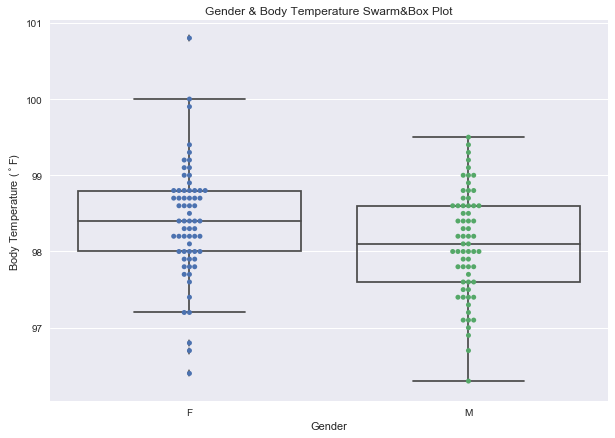

In [355]:
plt.figure(figsize = (10,7))
_ = sns.swarmplot(x= 'gender', y = 'temperature', data = df)
_ = sns.boxplot(x="gender", y="temperature", data=df, boxprops={'facecolor':'None'})
_ = plt.xlabel('Gender')
_ = plt.ylabel('Body Temperature ($^\circ$F)')
_ = plt.title ('Gender & Body Temperature Swarm&Box Plot')
plt.show()

**Null Hypothesis is: There is no significant difference between Males and Females in average(mean) temperature. 
We are going to implement 2_sample test.**

In [325]:
temp_m = df[df.gender == 'M']['temperature']
temp_f = df[df.gender == 'F']['temperature']

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

# Compute difference of mean temperature: empirical_diff_means
empirical_diff_means = diff_of_means(temp_f, temp_m)

# Concatenate data sets: concat_temp
concat_temp = np.concatenate((temp_f, temp_m))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(concat_temp, size=len(concat_temp))

    # Compute replicate
    bs_replicates[i] = diff_of_means(bs_sample[:len(temp_m)], bs_sample[len(temp_m):])

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / float(len(bs_replicates))
print ('p-value: {}'.format(p))


p-value: 0.0122


**Since p-value is less than 0.05 we should reject the null hypothesis which means females and males have different average body temperatures.**

# Conclusion

1. In this case we examined the temperature of human body using graphical, bootstrapping and frequestist methods.As a summary: 
   a.  Implementing graphical and functional methods we concluded that data is normally distributed. Female temperatures have some outliers. There is a possitive correlation between body_heat and temperature.
   b.  Null hypothesis test which is the true mean of population temperature is 98.6 is rejected based on the sample bootstrap and frequentist testing.
   c.  Once we keep the sample size too small, the t and z statistics become unreliable and each time they change.
   d.  With %95 confidence interval temperature outside of 98.12-98.37 was seen as abnormal according to the bootstrap testing. By choosing the same confidence interval, implementing frequentist test, abnormal temperature was defined outside of 98.47 - 98.72 interval, both of them are too tight to be normal.   
   e. Without the population standard deviation, the t-test was used in favor of the z-test and yieled a very small t-statistic, thus rejecting the null hypothesis.
   f. The body temperatures of men and women had distinct distributions, with varying means.